In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
file_path = './CO2 Emissions_Canada.csv' 
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)

# Calculate means and standard deviations
mean_fuel_L_100km = np.mean(sample_fuel_L_100km)
std_fuel_L_100km = np.std(sample_fuel_L_100km, ddof=1)
mean_fuel_mpg = np.mean(sample_fuel_mpg)
std_fuel_mpg = np.std(sample_fuel_mpg, ddof=1)
mean_engine_size = np.mean(sample_engine_size)
std_engine_size = np.std(sample_engine_size, ddof=1)

# Hypothesis testing for Fuel Consumption Comb (L/100 km) vs Fuel Consumption Comb (mpg)
t_statistic_fuel_L_mpg, p_value_fuel_L_mpg = stats.ttest_ind(sample_fuel_L_100km, sample_fuel_mpg)
# Confidence Interval for Fuel Consumption Comb (L/100 km)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical_fuel_L = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_L_100km)-1)
margin_of_error_fuel_L = t_critical_fuel_L * (std_fuel_L_100km / np.sqrt(len(sample_fuel_L_100km)))
confidence_interval_fuel_L = (mean_fuel_L_100km - margin_of_error_fuel_L, mean_fuel_L_100km + margin_of_error_fuel_L)

# Confidence Interval for Fuel Consumption Comb (mpg)
t_critical_fuel_mpg = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_mpg)-1)
margin_of_error_fuel_mpg = t_critical_fuel_mpg * (std_fuel_mpg / np.sqrt(len(sample_fuel_mpg)))
confidence_interval_fuel_mpg = (mean_fuel_mpg - margin_of_error_fuel_mpg, mean_fuel_mpg + margin_of_error_fuel_mpg)

# Hypothesis testing for Fuel Consumption Comb (L/100 km) vs Engine Size(L)
t_statistic_fuel_L_engine, p_value_fuel_L_engine = stats.ttest_ind(sample_fuel_L_100km, sample_engine_size)
# Confidence Interval for Engine Size(L)
t_critical_engine = stats.t.ppf(1 - alpha/2, df=len(sample_engine_size)-1)
margin_of_error_engine = t_critical_engine * (std_engine_size / np.sqrt(len(sample_engine_size)))
confidence_interval_engine = (mean_engine_size - margin_of_error_engine, mean_engine_size + margin_of_error_engine)

# Print the results
print("Mean and SD for Fuel Consumption Comb (L/100 km):", mean_fuel_L_100km, std_fuel_L_100km)
print("Mean and SD for Fuel Consumption Comb (mpg):", mean_fuel_mpg, std_fuel_mpg)
print("Mean and SD for Engine Size(L):", mean_engine_size, std_engine_size)
print("T-test result for Fuel L/100km vs Fuel mpg:", t_statistic_fuel_L_mpg, p_value_fuel_L_mpg)
print("Confidence Interval for Fuel Consumption Comb (L/100 km):", confidence_interval_fuel_L)
print("Confidence Interval for Fuel Consumption Comb (mpg):", confidence_interval_fuel_mpg)
print("T-test result for Fuel L/100km vs Engine Size:", t_statistic_fuel_L_engine, p_value_fuel_L_engine)
print("Confidence Interval for Engine Size(L):", confidence_interval_engine)


Mean and SD for Fuel Consumption Comb (L/100 km): 10.589 2.799382868498778
Mean and SD for Fuel Consumption Comb (mpg): 27.94 8.462418404482566
Mean and SD for Engine Size(L): 3.135 1.4644870167475785
T-test result for Fuel L/100km vs Fuel mpg: -19.466151617309244 7.274436528349633e-48
Confidence Interval for Fuel Consumption Comb (L/100 km): (10.033541705856173, 11.144458294143828)
Confidence Interval for Fuel Consumption Comb (mpg): (26.260872595106665, 29.619127404893337)
T-test result for Fuel L/100km vs Engine Size: 23.59372749660224 1.9526113583014899e-59
Confidence Interval for Engine Size(L): (2.8444140036105074, 3.425585996389492)


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)

# Correlation between Fuel Consumption Comb (L/100 km) and Fuel Consumption Comb (mpg)
correlation_fuel_L_mpg, p_value_fuel_L_mpg = stats.pearsonr(sample_fuel_L_100km, sample_fuel_mpg)
# Correlation between Fuel Consumption Comb (L/100 km) and Engine Size(L)
correlation_fuel_L_engine, p_value_fuel_L_engine = stats.pearsonr(sample_fuel_L_100km, sample_engine_size)

# Calculate the confidence intervals for the correlation coefficients
def correlation_ci(correlation, sample_size, confidence_level=0.95):
    z = np.arctanh(correlation)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_interval = z + np.array([-1, 1]) * z_critical * se
    return np.tanh(z_interval)

ci_fuel_L_mpg = correlation_ci(correlation_fuel_L_mpg, len(sample_fuel_L_100km))
ci_fuel_L_engine = correlation_ci(correlation_fuel_L_engine, len(sample_fuel_L_100km))

# Print the results
print("Correlation and p-value for Fuel Consumption Comb (L/100 km) vs Fuel Consumption Comb (mpg):", correlation_fuel_L_mpg, p_value_fuel_L_mpg)
print("Confidence Interval for correlation between Fuel Consumption Comb (L/100 km) and Fuel Consumption Comb (mpg):", ci_fuel_L_mpg)
print("Correlation and p-value for Fuel Consumption Comb (L/100 km) vs Engine Size(L):", correlation_fuel_L_engine, p_value_fuel_L_engine)
print("Confidence Interval for correlation between Fuel Consumption Comb (L/100 km) and Engine Size(L):", ci_fuel_L_engine)


Correlation and p-value for Fuel Consumption Comb (L/100 km) vs Fuel Consumption Comb (mpg): -0.050256999454027035 0.6194955423300073
Confidence Interval for correlation between Fuel Consumption Comb (L/100 km) and Fuel Consumption Comb (mpg): [-0.24426389  0.14761832]
Correlation and p-value for Fuel Consumption Comb (L/100 km) vs Engine Size(L): -0.0318368367845147 0.7531827697677718
Confidence Interval for correlation between Fuel Consumption Comb (L/100 km) and Engine Size(L): [-0.22683647  0.16561694]


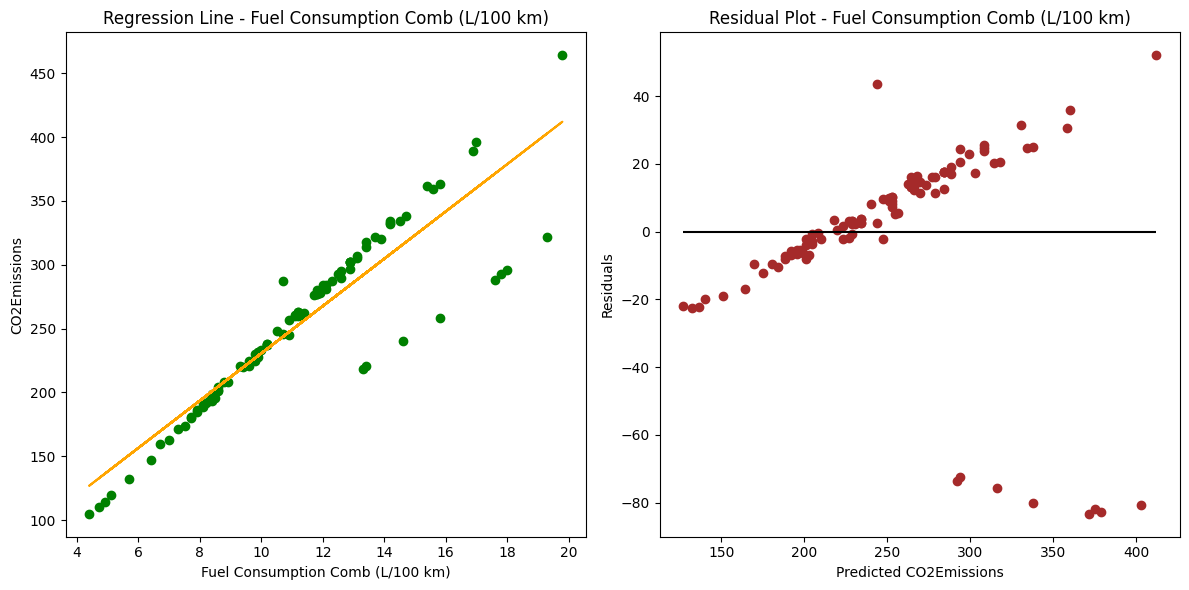

Linear Regression Equation: CO2 Emissions(g/km) = 45.6096 + 18.5029(Fuel Consumption Comb (L/100 km))
R-squared: 0.8256


In [7]:
# Fuel Consumption Comb (L/100 km) as Predictor for CO2 Emissions
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
sample_indices = np.random.choice(df.index, size=100, replace=False)

df = data
target_variable = df['CO2Emissions'].loc[sample_indices]

# Randomly select 100 samples for Fuel Consumption Comb (L/100 km) and CO2 Emissions
sample_fuel_L_100km = df['Fuel Consumption Comb (L/100 km)'].loc[sample_indices]

# Create the linear regression model for Fuel Consumption Comb (L/100 km)
model_fuel_L_100km = LinearRegression()
model_fuel_L_100km.fit(sample_fuel_L_100km.values.reshape(-1, 1), target_variable)

# Coefficients for Fuel Consumption Comb (L/100 km)
intercept_fuel_L_100km = model_fuel_L_100km.intercept_
slope_fuel_L_100km = model_fuel_L_100km.coef_[0]

# Predictions for Fuel Consumption Comb (L/100 km)
predictions_fuel_L_100km = model_fuel_L_100km.predict(sample_fuel_L_100km.values.reshape(-1, 1))

# R-squared for Fuel Consumption Comb (L/100 km)
r2_fuel_L_100km = r2_score(target_variable, predictions_fuel_L_100km)

# Plotting for Fuel Consumption Comb (L/100 km)
plt.figure(figsize=(12, 6))

# Regression Line Plot for Fuel Consumption Comb (L/100 km)
plt.subplot(1, 2, 1)
plt.scatter(sample_fuel_L_100km, target_variable, color='green')
plt.plot(sample_fuel_L_100km, predictions_fuel_L_100km, color='orange')
plt.title('Regression Line - Fuel Consumption Comb (L/100 km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2Emissions')

# Residual Plot for Fuel Consumption Comb (L/100 km)
plt.subplot(1, 2, 2)
residuals_fuel_L_100km = target_variable - predictions_fuel_L_100km
plt.scatter(predictions_fuel_L_100km, residuals_fuel_L_100km, color='brown')
plt.hlines(y=0, xmin=predictions_fuel_L_100km.min(), xmax=predictions_fuel_L_100km.max(), colors='black')
plt.title('Residual Plot - Fuel Consumption Comb (L/100 km)')
plt.xlabel('Predicted CO2Emissions')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print the regression equation and R-squared value for Fuel Consumption Comb (L/100 km)
print(f"Linear Regression Equation: CO2 Emissions(g/km) = {intercept_fuel_L_100km:.4f} + {slope_fuel_L_100km:.4f}(Fuel Consumption Comb (L/100 km))")
print(f"R-squared: {r2_fuel_L_100km:.4f}")
